<a href="https://colab.research.google.com/github/ashikshafi08/noname_repo_for_now/blob/main/Cogito_AI_ashik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/Shareddrives/Tabata/cogito challenge /dbb3bd26ead211eb.zip"

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sys 
import os 
import IPython
import tensorflow as tf 
print(tf.__version__)

2.6.0


In [2]:
train_df = pd.read_csv('/content/dataset/train.csv')
test_df = pd.read_csv('/content/dataset/test.csv')
submission_df = pd.read_csv('/content/dataset/sample_submission.csv')

In [3]:
def preprocess_dataframe(df , base_path = '/content/dataset/TrainAudioFiles/'):
  df['full_path'] = df['filename'].apply(lambda x: base_path+x)
  return df['full_path']

In [11]:
def preprocess_dataframe(df , base_path = '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/'):
  df['full_path'] = df['filename'].apply(lambda x: base_path + x[:-4] + '.wav')
  return df['full_path']

In [5]:
train_df['filename'][18]

'38543.wav'

In [9]:
train_df['wav_path'] = preprocess_dataframe(train_df)
train_df.head()


,filename,emotion,full_path,wav_path
0,18777.mp3,neutral,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
1,24041.mp3,neutral,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
2,1621.mp3,joy,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
3,28883.mp3,neutral,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
4,14918.mp3,neutral,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...


In [10]:
train_df.shape

(5816, 4)

In [11]:
train_df.drop(axis = 0 , index = 18, inplace= True)

In [12]:
train_df.shape

(5815, 4)

In [ ]:
train_df['wav_path'][0]

'/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/18777.wav'

In [ ]:
# from tqdm import tqdm
# train_files = train_df['full_path'].to_list()

from shutil import copyfile
for file_path in tqdm(train_df['full_path']):
  if file_path[-3:] == 'mp3':
      sound = AudioSegment.from_mp3(file_path)
      sound.export(out_f = f"{dest + '/'+ file_path[17:-4] + '.wav'}" , format = 'wav')
  elif file_path[-3:] == 'wav': 
      copyfile(src= file_path , dst= f"{dest + '/'+ file_path[17:-4] + '.wav'}")

dest = '/content/drive/Shareddrives/Tabata/cogito_audio_ds'
conv_dest = '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/'

import shutil

shutil.rmtree('/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles')
!mkdir '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles'

#!rmdir '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/'

In [ ]:
# Downloading tensorflow_io 
#!pip install tensorflow_io
import tensorflow_io as tfio
import tensorflow as tf 


In [ ]:
file_names = train_df['wav_path'].to_list()
file_names[:10] , train_df['emotion'][:10]

(['/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/18777.wav',
  '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/24041.wav',
  '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/1621.wav',
  '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/28883.wav',
  '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/14918.wav',
  '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/25793.wav',
  '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/8382.wav',
  '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/50666.wav',
  '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/28471.wav',
  '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/1459.wav'],
 0     neutral
 1     neutral
 2         joy
 3     neutral
 4     neutral
 5     neutral
 6         joy
 7     disgust
 8    surprise
 9     neutral
 Name: emotion, dtype: object)

In [ ]:
train_df.head(10)

,filename,emotion,full_path,wav_path
0,18777.mp3,neutral,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
1,24041.mp3,neutral,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
2,1621.mp3,joy,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
3,28883.mp3,neutral,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
4,14918.mp3,neutral,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
5,25793.mp3,neutral,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
6,8382.mp3,joy,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
7,50666.wav,disgust,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
8,28471.mp3,surprise,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...
9,1459.mp3,neutral,/content/drive/Shareddrives/Tabata/cogito_audi...,/content/drive/Shareddrives/Tabata/cogito_audi...


In [96]:
classes_dict = {'neutral': 0 , 'joy': 1 , 'disgust' : 2 , 
              'surprise': 3 , 'sadness': 4 , 'fear': 5 , 
              'anger': 6}
classes_dict

{'anger': 6,
 'disgust': 2,
 'fear': 5,
 'joy': 1,
 'neutral': 0,
 'sadness': 4,
 'surprise': 3}

In [97]:
# Mapping the label 
train_df['emotion_labels'] = train_df['emotion'].map(lambda x: classes_dict[x])
train_df

,filename,emotion,full_path,wav_path,emotion_labels
0,18777.mp3,neutral,/content/dataset/TrainAudioFiles/18777.mp3,/content/train_wav_files/TrainAudioFiles/18777...,0
1,24041.mp3,neutral,/content/dataset/TrainAudioFiles/24041.mp3,/content/train_wav_files/TrainAudioFiles/24041...,0
2,1621.mp3,joy,/content/dataset/TrainAudioFiles/1621.mp3,/content/train_wav_files/TrainAudioFiles/1621.wav,1
3,28883.mp3,neutral,/content/dataset/TrainAudioFiles/28883.mp3,/content/train_wav_files/TrainAudioFiles/28883...,0
4,14918.mp3,neutral,/content/dataset/TrainAudioFiles/14918.mp3,/content/train_wav_files/TrainAudioFiles/14918...,0
...,...,...,...,...,...
5811,6688.mp3,neutral,/content/dataset/TrainAudioFiles/6688.mp3,/content/train_wav_files/TrainAudioFiles/6688.wav,0
5812,41901.wav,fear,/content/dataset/TrainAudioFiles/41901.wav,/content/train_wav_files/TrainAudioFiles/41901...,5
5813,2066.mp3,neutral,/content/dataset/TrainAudioFiles/2066.mp3,/content/train_wav_files/TrainAudioFiles/2066.wav,0
5814,10825.mp3,surprise,/content/dataset/TrainAudioFiles/10825.mp3,/content/train_wav_files/TrainAudioFiles/10825...,3


In [ ]:
def decode_audio(file_path):
  try:
    file_path = file_path.decode('utf-8')
  except: 
    pass 
  # print(file_path)
  audio_binary = tf.io.read_file(file_path)
  if file_path[-3:] == 'mp3':
    audio= tfio.audio.decode_mp3(audio_binary)
    audio = np.array(audio)[:,:-1]
    sample_rate = [48048]
  else :
    audio,sample_rate = tf.audio.decode_wav(audio_binary)
    # print(audio.shape)
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)
  audio = tf.squeeze(audio, axis = -1)
  # wav = tfio.audio.resample(audio, rate_in=sample_rate,rate_out= 16000)

  if audio.shape[0] < 100000:
    to_append = 100000 - audio.shape[0]
    # print(to_append)
    # print(audio.numpy())
    audio = np.concatenate((audio.numpy(),np.zeros(to_append).astype(np.float32)))
  
  return audio


In [ ]:
audio

In [18]:
input_audio_files = tf.io.gfile.glob(train_df.wav_path)
input_labels = train_df['emotion_labels'].to_list()
input_class_labels = train_df['emotion'].to_list()

# Splitting into train and validation set 
train_file_names = input_audio_files[:4652]
val_file_names = input_audio_files[4652:]
train_labels = input_labels[:4652]
val_labels = input_labels[4652:]

train_labels_classes = input_class_labels[:4652]
val_labels_classes = input_class_labels[4652:]

# Checking the len 
len(train_file_names) , len(train_labels) , len(val_file_names) , len(val_labels)

(4652, 4652, 1163, 1163)

In [ ]:
type(input_audio_files)

list

In [ ]:
audio_1 = decode_audio(train_file_names[8])
audio_2 = decode_audio(train_file_names[4])
# plt.plot(audio)
# import IPython
# IPython.display.Audio(audio,rate = 44100)

In [ ]:
file_path = tf.io.read_file(train_file_names[36])
audio , sample_rate = tf.audio.decode_wav(file_path)
audio = tf.reshape(audio , shape= [-1])
audio

<tf.Tensor: shape=(484218,), dtype=float32, numpy=
array([-0.00192261, -0.00326538, -0.00302124, ..., -0.00396729,
        0.00213623, -0.00115967], dtype=float32)>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# Load the model.
model = hub.load('https://tfhub.dev/google/vggish/1')

# Input: 3 seconds of silence as mono 16 kHz waveform samples.
waveform = np.zeros(3 * 16000, dtype=np.float32)

# Run the model, check the output.
embeddings = model(waveform)
embeddings.shape.assert_is_compatible_with([None, 128])


In [ ]:
vg = model(audio_1)
vg.shape

TensorShape([6, 128])

In [ ]:
for file in train_file_names[:50]:
  audio = decode_audio(file)
  vgg_embed = model(audio)
  print(vgg_embed.shape)

(6, 128)
(9, 128)
(6, 128)
(6, 128)
(8, 128)
(7, 128)
(6, 128)
(6, 128)
(6, 128)
(6, 128)
(6, 128)
(11, 128)
(6, 128)
(6, 128)
(10, 128)
(11, 128)
(6, 128)
(6, 128)


InvalidArgumentError: ignored

In [ ]:
train_wave_list = [convert_wave(file) for file in train_file_names]
train_wave_list

InvalidArgumentError: ignored

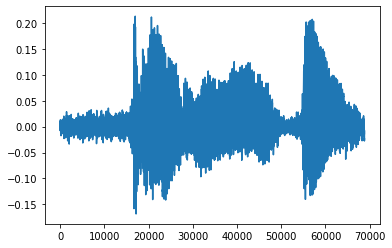

In [ ]:
plt.plot(new_ten)

In [ ]:
def preprocess_func(filename):
  file_path = tf.io.read_file(filename)
  wav_audio , _ = tf.audio.decode_wav(file_path)
  audio_tensor = tf.reshape(wav_audio , shape = [-1])
  return audio_tensor 


In [ ]:
train_wave_ds = train_wave_ds.batch(32)
train_wave_ds

<BatchDataset shapes: (None, None), types: tf.float32>

In [ ]:
train_wave_list = [preprocess_func(file) for file in train_file_names]
train_wave_list

InvalidArgumentError: ignored

In [ ]:
train_file_names[:20]

['/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/18777.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/24041.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/1621.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/28883.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/14918.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/25793.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/8382.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/50666.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/28471.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/1459.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/6829.wav',
 '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/29833.wav',
 '/content/drive/Shareddrives/Ta

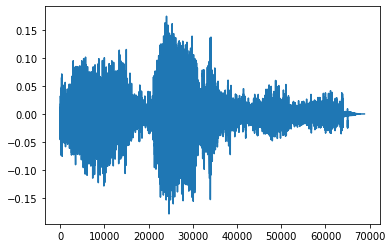

In [ ]:
# Trying to plot the audio 
import matplotlib.pyplot as plt
plt.figure()
plt.plot(audio.numpy())

In [ ]:
train_wave_ds = tf.data.Dataset.from_tensor_slices(train_file_names)
train_wave_ds = train_wave_ds.map(preprocess_func)
train_wave_ds

<MapDataset shapes: (None,), types: tf.float32>

In [ ]:
for x in train_wave_ds.take(len(train_file_names)):
  print(x.shape)

(215208,)
(296352,)
(30046,)
(137592,)
(248724,)
(218736,)
(215208,)
(48048,)
(74088,)
(145530,)
(171108,)
(340452,)
(149058,)
(148176,)
(318402,)
(351036,)
(135828,)
(68796,)


InvalidArgumentError: ignored

In [ ]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3(train_file_names[3])
sound.export("file.wav", format="wav")

pydub.audio_segment.AudioSegment

In [ ]:
file = tf.io.read_file('/content/file.wav')
wav_audio , _ = tf.audio.decode_wav(file)
wav_audio

<tf.Tensor: shape=(68796, 2), dtype=float32, numpy=
array([[ 0.00134277, -0.00253296],
       [ 0.00164795, -0.00192261],
       [ 0.00189209,  0.00048828],
       ...,
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]], dtype=float32)>

In [ ]:
def dum_func(filenames):
  sound = AudioSegment.from_mp3()
  

In [ ]:
audio = tf.reshape(wav_audio , shape= wav_audio.shape[0] + wav_audio.shape[0])

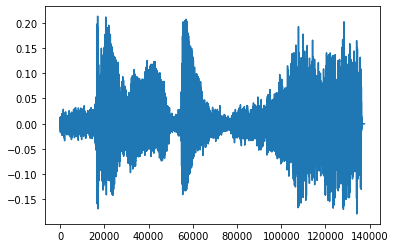

In [ ]:
plt.plot(audio)

Below are the junk code's please ignore! 

In [ ]:

# # Putting everything into a function 
# def play_audio(file_names , labels):
  
#   # Random audio and corresponding label 
#   random_audio = random.choice(file_names)
#   audio_index = file_names.index(random_audio)
#   audio_label = labels[audio_index]

#   # Getting the audio path and loading in the audio
#   audio_path = tf.io.read_file(random_audio)
#   audio = tfio.audio.AudioIOTensor(str(file_names[audio_index]))

#   # Converting the audio into a tensor and reshaping it 
#   audio_tensor = audio.to_tensor()
#   audio_tensor_reshaped = tf.reshape(audio_tensor , shape = audio_tensor.shape[0] + audio_tensor.shape[0])

#   # Playing the audio 
#   print(f'The label for the below audio is: {audio_label}\n')
#   return (Audio(audio_tensor_reshaped.numpy() , rate = audio.rate.numpy() + audio.rate.numpy()) , audio_tensor_reshaped , audio_label)



# # # Making a preprocessing function 
# # def preprocess_data(file_name):
  
# #   # Getting the audio path and loading in the audio
# #   audio_path = tf.io.read_file(file_name)
# #   audio = tfio.audio.AudioIOTensor(str(file_name))

# #   # Converting the audio into a tensor and reshaping it 
# #   audio_tensor = audio.to_tensor()
# #   audio_tensor_reshaped = tf.reshape(audio_tensor , shape = audio_tensor.shape[0] + audio_tensor.shape[0])

# #   return audio_tensor_reshaped , label

# #   # Random audio and corresponding label 
# # import random
# # random_audio = random.choice(train_file_names)

# # # Getting the audio path and loading in the audio
# # audio = tfio.audio.AudioIOTensor(str(random_audio))
# # audio_tensor = audio.to_tensor()

# # #print(tf.squeeze(audio.to_tensor()))
# # print(audio_tensor.shape[0] , audio_tensor.shape[1]) # 119070 2
# # #tf.reshape(audio_tensor , shape = )

# # # # Converting the audio into a tensor and reshaping it 
# # # audio_tensor = audio.to_tensor()
# # # audio_tensor_reshaped = tf.reshape(audio_tensor , shape = audio_tensor.shape[0] + audio_tensor.shape[0])




133182 2


In [ ]:
len(train_file_names)

4652

In [ ]:
# Building the dataset for our data 
train_ds = tf.data.Dataset.from_tensor_slices((train_file_names , train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((val_file_names , val_labels))

train_ds = train_ds.batch(32) 
valid_ds = valid_ds.batch(32)

In [ ]:
train_ds , valid_ds

(<BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int32)>,
 <BatchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int32)>)

In [ ]:
# Actual data to be feeded inside the model 
train_data = train_ds.map(lambda x , y : (preprocess_func(x) , y) , num_parallel_calls= tf.data.AUTOTUNE)
train_data = train_data.prefetch(tf.data.AUTOTUNE)

valid_data = valid_ds.map(lambda x , y : (preprocess_func(x) , y) , num_parallel_calls= tf.data.AUTOTUNE)
valid_data = valid_data.prefetch(tf.data.AUTOTUNE)

train_data , valid_data

ValueError: ignored

In [ ]:
# Without batch_size (Only for plotting)
plot_train_data = train_ds.map(map_func= preprocess_func , num_parallel_calls= tf.data.AUTOTUNE)
plot_valid_data = valid_ds.map(preprocess_func , num_parallel_calls= tf.data.AUTOTUNE)


In [ ]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, (audio, label) in enumerate(plot_train_data.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show();

In [ ]:
train

In [ ]:
classes = train_df['emotion_labels'].unique()
num_classes = len(classes)
num_classes

7

In [ ]:
# Creating the residual blocks 
def residual_block(x , filters , conv_num = 3 , activation = 'relu'): 
  layer = tf.keras.layers.Conv1D(filters , 1 , padding = 'same')(x)
  for i in range(conv_num - 1):
    x = tf.keras.layers.Conv1D(filters , 3 , padding = 'same')(x)
    x = tf.keras.layers.Activation(activation)(x)
  x = tf.keras.layers.Conv1D(filters , 3 , padding='same')(x)
  x = tf.keras.layers.Add()([x , s])
  x = tf.keras.layers.Activation(activation)(x)
  return tf.keras.layers.MaxPool1D(pool_size= 2 , stride = 2)(x)


In [ ]:
for x , y in train_dataset.take(1):
  print(x)

InvalidArgumentError: ignored

In [ ]:
for x , y in plot_train_data.take(1):
  print(x.shape[0])

215208


In [ ]:
# Building the model 
def build_model(input_shape,num_classes):
  inputs = tf.keras.layers.Input(shape = input_shape , name = 'input_layer')

  x = residual_block(inputs, 16, 2)
  x = residual_block(x, 32, 2)
  x = residual_block(x, 64, 3)
  x = residual_block(x, 128, 3)
  x = residual_block(x, 128, 3)

  x = tf.keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(32, activation="relu")(x)
  
  outputs = tf.keras.layers.Dense(num_classes , activation= 'softmax' , name = 'output_layer')(x)

  # Packing into a model 
  model = tf.keras.Model(inputs = inputs , outputs = outputs)
  return model

In [ ]:
for x , y in plot_train_data.take(2):
  print(x.shape)

(215208,)
(296352,)


In [ ]:
model = build_model( (None , x.shape[0]), num_classes)

model.summary()

NameError: ignored

# New Method 

In [22]:
for i in fil:
  if i == '38543.wav':
    print(i)

In [5]:
train_path = '/content/dataset/TrainAudioFiles/'
import os 
print(len(os.listdir(train_path)))
print(train_df['filename'][18])
# Removing the wav file of the 18th index 

# os.remove('/content/dataset/TrainAudioFiles/38543.wav')
# len(os.listdir(train_wav_path))

5815
38543.wav


In [7]:
train_df.head(20)

,filename,emotion
0,18777.mp3,neutral
1,24041.mp3,neutral
2,1621.mp3,joy
3,28883.mp3,neutral
4,14918.mp3,neutral
5,25793.mp3,neutral
6,8382.mp3,joy
7,50666.wav,disgust
8,28471.mp3,surprise
9,1459.mp3,neutral


In [8]:
def preprocess_dataframe(df , base_path = '/content/dataset/TrainAudioFiles/'):
  df['full_path'] = df['filename'].apply(lambda x: base_path+x)
  return df['full_path']

In [9]:
preprocess_dataframe(train_df)
train_df

,filename,emotion,full_path
0,18777.mp3,neutral,/content/dataset/TrainAudioFiles/18777.mp3
1,24041.mp3,neutral,/content/dataset/TrainAudioFiles/24041.mp3
2,1621.mp3,joy,/content/dataset/TrainAudioFiles/1621.mp3
3,28883.mp3,neutral,/content/dataset/TrainAudioFiles/28883.mp3
4,14918.mp3,neutral,/content/dataset/TrainAudioFiles/14918.mp3
...,...,...,...
5811,6688.mp3,neutral,/content/dataset/TrainAudioFiles/6688.mp3
5812,41901.wav,fear,/content/dataset/TrainAudioFiles/41901.wav
5813,2066.mp3,neutral,/content/dataset/TrainAudioFiles/2066.mp3
5814,10825.mp3,surprise,/content/dataset/TrainAudioFiles/10825.mp3


In [10]:
# Getting rid of the 18th index which is a bug 
train_df.drop(index = 18 , axis = 1 , inplace = True )

In [12]:
train_df.head(20)

,filename,emotion,full_path
0,18777.mp3,neutral,/content/dataset/TrainAudioFiles/18777.mp3
1,24041.mp3,neutral,/content/dataset/TrainAudioFiles/24041.mp3
2,1621.mp3,joy,/content/dataset/TrainAudioFiles/1621.mp3
3,28883.mp3,neutral,/content/dataset/TrainAudioFiles/28883.mp3
4,14918.mp3,neutral,/content/dataset/TrainAudioFiles/14918.mp3
5,25793.mp3,neutral,/content/dataset/TrainAudioFiles/25793.mp3
6,8382.mp3,joy,/content/dataset/TrainAudioFiles/8382.mp3
7,50666.wav,disgust,/content/dataset/TrainAudioFiles/50666.wav
8,28471.mp3,surprise,/content/dataset/TrainAudioFiles/28471.mp3
9,1459.mp3,neutral,/content/dataset/TrainAudioFiles/1459.mp3


In [41]:
# shutil.rmtree('/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles')
# !mkdir '/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles'

In [11]:
# Importing pydub for the converson 
!pip install pydub

from pydub import AudioSegment

In [14]:
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile

In [16]:
# Converting mp3 to wav file and storing them into a directory 
dest = '/content/train_wav_files' # Destination folder

from tqdm import tqdm
from shutil import copyfile
for file_path in tqdm(train_df['full_path']):
  if file_path[-3:] == 'mp3':
      sound = AudioSegment.from_mp3(file_path)
      sound.export(out_f = f"{dest + '/'+ file_path[17:-4] + '.wav'}" , format = 'wav')
  elif file_path[-3:] == 'wav': 
      copyfile(src= file_path , dst= f"{dest + '/'+ file_path[17:-4] + '.wav'}")


100%|██████████| 5815/5815 [12:12<00:00,  7.94it/s]


In [18]:
# Checking the destination folder whether there are right number of files 
len(os.listdir('/content/train_wav_files/TrainAudioFiles'))

5815

In [20]:
train_df.head()


,filename,emotion,full_path
0,18777.mp3,neutral,/content/dataset/TrainAudioFiles/18777.mp3
1,24041.mp3,neutral,/content/dataset/TrainAudioFiles/24041.mp3
2,1621.mp3,joy,/content/dataset/TrainAudioFiles/1621.mp3
3,28883.mp3,neutral,/content/dataset/TrainAudioFiles/28883.mp3
4,14918.mp3,neutral,/content/dataset/TrainAudioFiles/14918.mp3


In [55]:
import random 
list_of_filenames = os.listdir('/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/')
random_filename = random.choice(list_of_filenames)

# Reading in a random filename
sample_rate , test_sound = wavfile.read('/content/drive/Shareddrives/Tabata/cogito_audio_ds/TrainAudioFiles/' + random_filename)
random_audio = tf.reshape(test_sound , shape = [-1]) # reshape into 1D array 
random_audio

<tf.Tensor: shape=(115542,), dtype=int16, numpy=array([-228, -160, -384, ...,  -20,    2,  -13], dtype=int16)>

In [56]:
# Playing the above random audio 
import IPython 
from IPython.display import Audio

Audio(random_audio , rate = sample_rate + sample_rate)

In [71]:
# Function for the spectrogram 
def log_spectogram(audio , sample_rate , window_size = 20 , 
                   step_size = 10 , eps = 1e-10):
  
  nperseg = int(round(window_size * sample_rate / 1e3))
  noverlap = int(round(step_size * sample_rate / 1e7))

  freqs , _ , spec = signal.spectrogram(audio , 
                                        fs = sample_rate , 
                                        window = 'hann' , 
                                        nperseg = nperseg , 
                                        noverlap = noverlap , 
                                        detrend = False)
  return freqs , np.log(spec.T.astype(np.float32) + eps)

In [62]:
_ , spectogram = log_spectogram(random_audio, sample_rate)

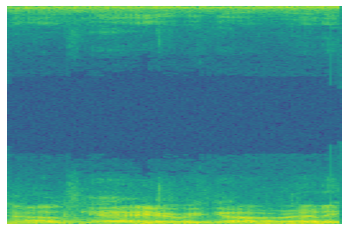

In [63]:
plt.imshow(spectogram.T , aspect= 'auto' , origin = 'lower')
plt.axis('off');

In [85]:
train_df['filename'][5575][:-3] 

'14838.'

In [ ]:
# # Converting mp3 to wav file and storing them into a directory 
# dest = '/content/drive/Shareddrives/Tabata/cogito_audio_ds' # Destination folder

# from shutil import copyfile
# for file_path in tqdm(train_df['full_path']):
#   if file_path[-3:] == 'mp3':
#       sound = AudioSegment.from_mp3(file_path)
#       sound.export(out_f = f"{dest + '/'+ file_path[17:-4] + '.wav'}" , format = 'wav')
#   elif file_path[-3:] == 'wav': 
#       copyfile(src= file_path , dst= f"{dest + '/'+ file_path[17:-4] + '.wav'}")


In [87]:
train_df['filename'][:10]

0    18777.mp3
1    24041.mp3
2     1621.mp3
3    28883.mp3
4    14918.mp3
5    25793.mp3
6     8382.mp3
7    50666.wav
8    28471.mp3
9     1459.mp3
Name: filename, dtype: object

In [95]:
pd.set_option('display.max_colwidth', None)

In [21]:
# Add the wav and png extension to the full path 
ext_path = '/content/train_wav_files/TrainAudioFiles/'
file_list = []

for file in tqdm(train_df['filename']):
  if file[-3:] == 'mp3':
     file_list.append(ext_path + file[:-3] +  'wav')
  elif file[-3:] == 'wav':
    file_list.append( ext_path + file)

print(len(file_list))

100%|██████████| 5815/5815 [00:00<00:00, 528239.58it/s]

5815


In [22]:
# Adding the list to our column 
train_df['wav_path'] = file_list 
train_df.head(10)

,filename,emotion,full_path,wav_path
0,18777.mp3,neutral,/content/dataset/TrainAudioFiles/18777.mp3,/content/train_wav_files/TrainAudioFiles/18777...
1,24041.mp3,neutral,/content/dataset/TrainAudioFiles/24041.mp3,/content/train_wav_files/TrainAudioFiles/24041...
2,1621.mp3,joy,/content/dataset/TrainAudioFiles/1621.mp3,/content/train_wav_files/TrainAudioFiles/1621.wav
3,28883.mp3,neutral,/content/dataset/TrainAudioFiles/28883.mp3,/content/train_wav_files/TrainAudioFiles/28883...
4,14918.mp3,neutral,/content/dataset/TrainAudioFiles/14918.mp3,/content/train_wav_files/TrainAudioFiles/14918...
5,25793.mp3,neutral,/content/dataset/TrainAudioFiles/25793.mp3,/content/train_wav_files/TrainAudioFiles/25793...
6,8382.mp3,joy,/content/dataset/TrainAudioFiles/8382.mp3,/content/train_wav_files/TrainAudioFiles/8382.wav
7,50666.wav,disgust,/content/dataset/TrainAudioFiles/50666.wav,/content/train_wav_files/TrainAudioFiles/50666...
8,28471.mp3,surprise,/content/dataset/TrainAudioFiles/28471.mp3,/content/train_wav_files/TrainAudioFiles/28471...
9,1459.mp3,neutral,/content/dataset/TrainAudioFiles/1459.mp3,/content/train_wav_files/TrainAudioFiles/1459.wav


In [28]:
import tensorflow as tf 
import random 
wavlist = train_df.wav_path.to_list()
random_wav_file = random.choice(wavlist)

audio = tf.io.read_file(random_wav_file)
audio

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF("\x07\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00D\xac\x00\x00\x10\xb1\x02\x00\x04\x00\x10\x00data\x04"\x07\x00\xf6\xff\xea\xff\xe6\xff\xe0\xff\xce\xff\xd1\xff\xad\xff\xc6\xff\x93\xff\xc3\xff~\xff\xb8\xffZ\xff\x9f\xff1\xff\x85\xff\x19\xffr\xff\x0b\xffd\xff\xfd\xfe^\xff\xfa\xfef\xff\x0e\xffw\xff)\xff\x80\xffA\xff|\xff^\xff\x8d\xff\x84\xff\xbf\xff\xa4\xff\xe3\xff\xae\xff\xe2\xff\xad\xff\xd6\xff\xae\xff\xc8\xff\xac\xff\xa9\xff\x9b\xff\x90\xffx\xff\x88\xffP\xffw\xff-\xffP\xff\x1a\xff#\xff$\xff\x05\xffE\xff\r\xffk\xff-\xff\x88\xffG\xff\x9d\xff]\xff\xbf\xff\x89\xff\x02\x00\xca\xffJ\x00\xfd\xffh\x00\x0f\x00d\x00\x08\x00O\x00\xf6\xff)\x00\xd6\xff\xfc\xff\xa4\xff\xdb\xffz\xff\xb7\xffa\xff\x85\xffB\xffc\xff#\xffb\xff)\xffv\xffV\xff\x90\xff|\xff\xad\xff\x97\xff\xd2\xff\xc1\xff\t\x00\x00\x00B\x008\x00[\x00I\x00G\x00$\x00\x17\x00\xe0\xff\xea\xff\x9e\xff\xd1\xffe\xff\xc0\xff3\xff\x9d\xff\x15\xffn\xff\x06\xffK\xff\x03\xff7\xff\x13\xff4\xff)\xff;\xff,\x

In [100]:
waveform_array = []
spectogram_array = []
for file in wavlist:
  sample_rate , waveform = wavfile.read(file)
  waveform = tf.reshape(waveform , shape = [-1])
  waveform_array.append(waveform.shape[0])
  _ , specto = log_spectogram(waveform , sample_rate)
  spectogram_array.append(specto)

len(waveform_array) , len(spectogram_array)


(5815, 5815)

In [79]:
sample_rate

44100

In [85]:
z = tf.zeros([7056] - tf.shape(waveform_array[0]) , dtype = tf.float32)
e = tf.concat([waveform_array[0] , z] , 0)
_ , sp = log_spectogram(e , sample_rate)

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 882 is greater than input length  = 2, using nperseg = 2
  .format(nperseg, input_length))


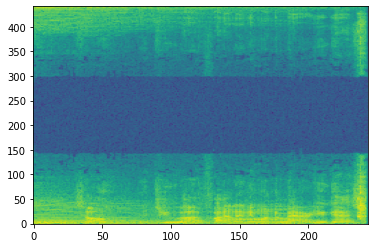

In [94]:
plt.imshow(spectogram_array[0].T, aspect='auto', origin='lower')


In [101]:
for array in spectogram_array[20:60]:
  print(array.shape)

(236, 442)
(112, 442)
(386, 442)
(139, 442)
(152, 442)
(40, 442)
(18, 442)
(180, 442)
(67, 442)
(102, 442)
(167, 442)
(148, 161)
(125, 161)
(207, 442)
(219, 442)
(549, 442)
(119, 442)
(236, 442)
(334, 442)
(211, 442)
(119, 442)
(269, 442)
(265, 442)
(156, 442)
(844, 442)
(136, 161)
(119, 442)
(319, 442)
(177, 442)
(106, 442)
(386, 442)
(46, 442)
(315, 442)
(165, 442)
(323, 442)
(311, 442)
(323, 442)
(96, 442)
(173, 442)
(340, 442)


In [104]:
labels = train_df['emotion_labels'].to_list()
type(labels[0]) , type(spectogram_array[0])

(int, numpy.ndarray)

In [107]:
spectogram_array[0].shape , tf.ragged.constant(spectogram_array[0]).shape

((244, 442), TensorShape([244, None]))

In [ ]:
# Building a dataset 
new_ds = tf.data.Dataset.from_tensor_slices(([tf.ragged.constant(specto) for specto in spectogram_array] , train_df['emotion_labels'].to_list()))

new_ds = new_ds.batch(32).prefetch(tf.data.AUTOTUNE)
new_ds

In [ ]:
train_ds = 

In [70]:
max(waveform_array) , min(waveform_array)

(1782522, 7056)

In [69]:
waveform_array[:10]

[215208, 296352, 30046, 137592, 248724, 218736, 215208, 48048, 74088, 145530]

In [32]:
tf.shape(audio)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([233730], dtype=int32)>

In [100]:
input_audio_files = tf.io.gfile.glob(train_df.wav_path)
#input_labels = train_df['emotion_labels'].to_list()
input_class_labels = train_df['emotion'].to_list()

# Splitting into train and validation set 
train_file_names = input_audio_files[:4652]
val_file_names = input_audio_files[4652:]
train_labels = input_class_labels[:4652]
val_labels = input_class_labels[4652:]

train_labels_classes = input_class_labels[:4652]
val_labels_classes = input_class_labels[4652:]

# Checking the len 
len(train_file_names) , len(train_labels) , len(val_file_names) , len(val_labels)

(4652, 4652, 1163, 1163)

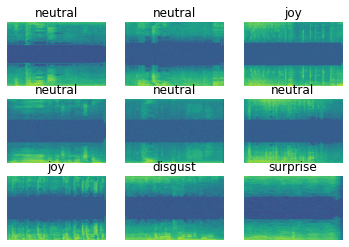

In [102]:
# for each of the samples
for i, filepath in enumerate(train_file_names[9:18]):
    # Make subplots
    plt.subplot(3,3,i+1)
    
    # pull the labels
    plt.title(train_labels_classes[i])

    
    # create spectogram
    samplerate, test_sound  = wavfile.read(filepath)
    test_sound = tf.reshape(test_sound , shape= [-1])
    _, spectrogram = log_spectogram(test_sound, samplerate + sample_rate)
    
    plt.imshow(spectrogram.T, aspect='auto', origin='lower')
    plt.axis('off')

In [ ]:
# import IPython.display as ipd
# ipd.Audio(test_sound , rate= sample_rate + sample_rate)

In [ ]:
# Saving the above figure as an image 
trgt_folder = '/content/drive/MyDrive/cogito_wav_img/train_files/' + train_df['filename'][6][:-4]
_, spectrogram = log_spectogram(test_sound, samplerate + sample_rate)    
plt.imshow(spectrogram.T, aspect='auto', origin='lower')
plt.imsave('%s.png' % trgt_folder , spectogram)

In [ ]:
wav_path = train_df['wav_path'].to_list()
len(wav_path) , len(input_audio_files)

In [ ]:
wav_path[:5] , input_audio_files[:5]

In [110]:
for i in range(20):
  try: 
    print(train_df['emotion'][i])
  except KeyError:
    pass

neutral
neutral
joy
neutral
neutral
neutral
joy
disgust
surprise
neutral
joy
neutral
joy
neutral
sadness
neutral
sadness
joy
neutral


In [112]:
from tqdm import tqdm 
for i , file_path in tqdm(enumerate(input_audio_files)):
  try: 
    trgt_folder = '/content/drive/MyDrive/cogito_wav_img/train_images/' + train_df['emotion'][i] +'_' + train_df['filename'][i][:-4]
    sample_rate , audio = wavfile.read(file_path)
    audio = tf.reshape(audio , shape = [-1])
    _ , spectogram = log_spectogram(audio , sample_rate + sample_rate)
    plt.imsave('%s.png' % trgt_folder , spectogram)
  except:
    pass 
 

5815it [09:11, 10.54it/s]



In [123]:
wav_file_list = os.listdir('/content/drive/MyDrive/cogito_wav_img/train_images/')
wav_file = random.choice(wav_file_list)
wav_file

'neutral_13086.png'

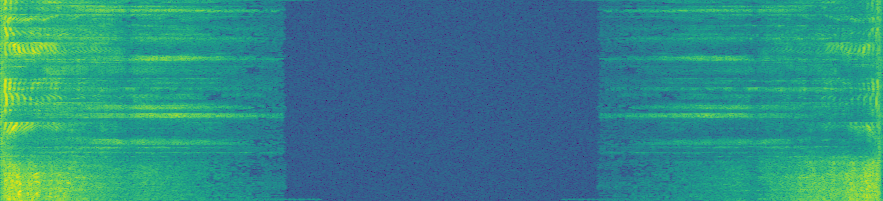

In [124]:
from IPython.display import Image
Image('/content/drive/MyDrive/cogito_wav_img/train_images/' + wav_file) 


In [126]:
test_df

,filename
0,26199.mp3
1,692.mp3
2,16821.mp3
3,1608.mp3
4,47947.wav
...,...
2487,16692.mp3
2488,29505.mp3
2489,5807.mp3
2490,43982.wav


#### Converting the test audio files into png

In [12]:
# Doing thhe conversion for the test images 
test_wav_path = '/content/dataset/TestAudioFiles/'
print(len(os.listdir(test_wav_path)))

preprocess_dataframe(test_df , base_path= '/content/dataset/TestAudioFiles/')
test_df.head(10)

2492


,filename,full_path
0,26199.mp3,/content/dataset/TestAudioFiles/26199.wav
1,692.mp3,/content/dataset/TestAudioFiles/692.wav
2,16821.mp3,/content/dataset/TestAudioFiles/16821.wav
3,1608.mp3,/content/dataset/TestAudioFiles/1608.wav
4,47947.wav,/content/dataset/TestAudioFiles/47947.wav
5,26679.mp3,/content/dataset/TestAudioFiles/26679.wav
6,45080.wav,/content/dataset/TestAudioFiles/45080.wav
7,15385.mp3,/content/dataset/TestAudioFiles/15385.wav
8,29210.mp3,/content/dataset/TestAudioFiles/29210.wav
9,22481.mp3,/content/dataset/TestAudioFiles/22481.wav


In [130]:
# Converting mp3 to wav file and storing them into a directory 
test_dest = '/content/test_wav_files'

from shutil import copyfile
for file_path in tqdm(test_df['full_path']):
  if file_path[-3:] == 'mp3':
      sound = AudioSegment.from_mp3(file_path)
      sound.export(out_f = f"{test_dest + '/'+ file_path[17:-4] + '.wav'}" , format = 'wav')
  elif file_path[-3:] == 'wav': 
      copyfile(src= file_path , dst= f"{test_dest + '/'+ file_path[17:-4] + '.wav'}")


100%|██████████| 2492/2492 [05:49<00:00,  7.13it/s]


In [21]:
test_dest = '/content/test_wav_files'
len(os.listdir(test_dest + "/" + 'TestAudioFiles'))

2493

In [19]:
test_df['full_path'][:300]

0      /content/dataset/TestAudioFiles/26199.wav
1        /content/dataset/TestAudioFiles/692.wav
2      /content/dataset/TestAudioFiles/16821.wav
3       /content/dataset/TestAudioFiles/1608.wav
4      /content/dataset/TestAudioFiles/47947.wav
                         ...                    
295      /content/dataset/TestAudioFiles/772.wav
296    /content/dataset/TestAudioFiles/44084.wav
297    /content/dataset/TestAudioFiles/41932.wav
298    /content/dataset/TestAudioFiles/16316.wav
299    /content/dataset/TestAudioFiles/23712.wav
Name: full_path, Length: 300, dtype: object

In [22]:
# Now converting the wav files to png 
from tqdm import tqdm 
for i , file_path in tqdm(enumerate(test_df['full_path'].to_list())): 
    trgt_folder = '/content/drive/MyDrive/cogito_wav_img/test_images'
    sample_rate , audio = wavfile.read(file_path)
    audio = tf.reshape(audio , shape = [-1])
    _ , spectogram = log_spectogram(audio , sample_rate + sample_rate)
    plt.imsave('%s.png' % trgt_folder , spectogram)


0it [00:00, ?it/s]


FileNotFoundError: ignored

In [26]:
test_audio , rate = wavfile.read(test_df['full_path'][5])
test_audio

FileNotFoundError: ignored

In [25]:

test_audio_files = tf.io.gfile.glob(test_df['full_path'].to_list())
len(test_audio_files)

226

In [14]:
# import os 
# len(os.listdir('/content/drive/MyDrive/cogito_wav_img/train_images'))

test_df

,filename,full_path
0,26199.mp3,/content/dataset/TestAudioFiles/26199.wav
1,692.mp3,/content/dataset/TestAudioFiles/692.wav
2,16821.mp3,/content/dataset/TestAudioFiles/16821.wav
3,1608.mp3,/content/dataset/TestAudioFiles/1608.wav
4,47947.wav,/content/dataset/TestAudioFiles/47947.wav
...,...,...
2487,16692.mp3,/content/dataset/TestAudioFiles/16692.wav
2488,29505.mp3,/content/dataset/TestAudioFiles/29505.wav
2489,5807.mp3,/content/dataset/TestAudioFiles/5807.wav
2490,43982.wav,/content/dataset/TestAudioFiles/43982.wav


In [28]:
os.listdir('/content/drive/MyDrive/cogito_wav_img/train_images')[:10]

['neutral_18777.png',
 'neutral_24041.png',
 'joy_1621.png',
 'neutral_28883.png',
 'neutral_14918.png',
 'neutral_25793.png',
 'joy_8382.png',
 'disgust_50666.png',
 'surprise_28471.png',
 'neutral_1459.png']